#### Import Required Packages

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


import tensorflow as tf
from tensorflow.keras.models import load_model, save_model

import pickle


#### Loading the dataset

In [2]:
dataset = pd.read_csv('NFLX.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [19]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [9]:
# Making a copy of the dataset
viz = dataset.copy()

#### Dataset Meta Data Information

In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB
None


#### Check for any nulls in the dataset

In [6]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no nulls in the dataset

#### Statisctical information 

In [8]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


#### EDA

In [11]:
cor = dataset.iloc[:,1:].corr()
cor

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


<Axes: >

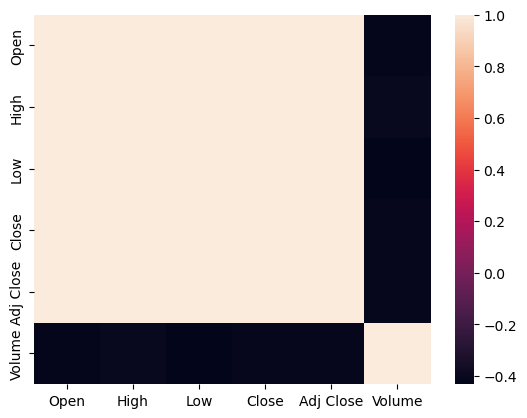

In [13]:
sns.heatmap(cor)

##### Relation b/w Open and Close variables

<Axes: xlabel='Open', ylabel='Close'>

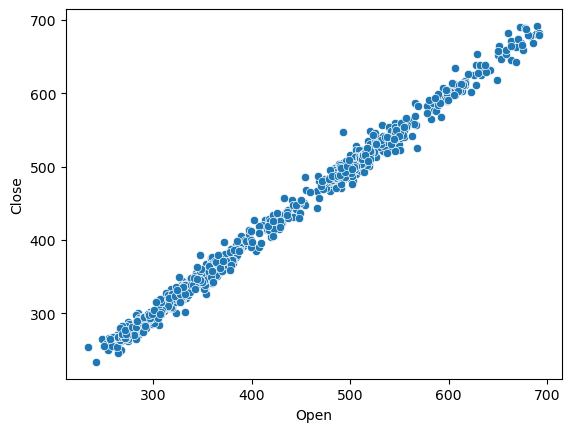

In [29]:
sns.scatterplot(data = dataset, 
                x= 'Open', 
                y = 'Close',
               )

We see that as value of Open increases, the close value also increases, showing positive correlation.

##### Relation b/w High and Close Variables

<Axes: xlabel='High', ylabel='Close'>

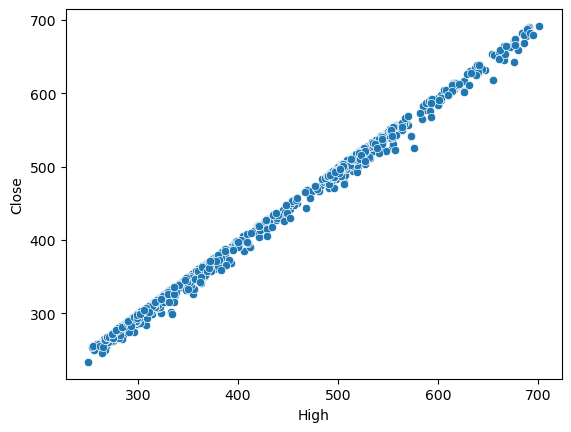

In [32]:
sns.scatterplot(data = dataset, 
                x= 'High', 
                y = 'Close',
               )

We see that as value of High increases, the close value also increases, showing positive correlation.

##### Relation b/w Low and Close Variables

<Axes: xlabel='Low', ylabel='Close'>

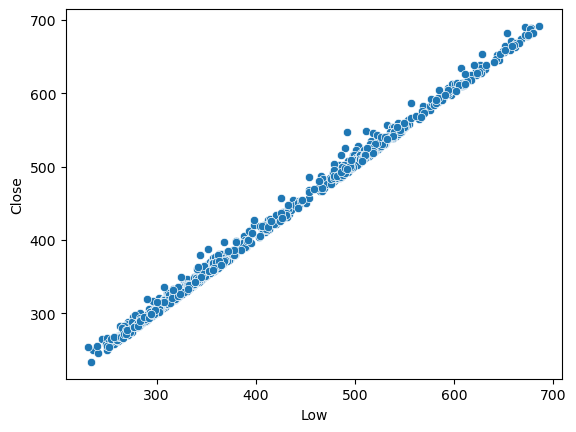

In [31]:
sns.scatterplot(data = dataset, 
                x= 'Low', 
                y = 'Close',
               )

We see that as value of Low increases, the close value also increases, showing positive correlation.

##### Relation b/w Volume and Close Variables

<Axes: xlabel='Volume', ylabel='Close'>

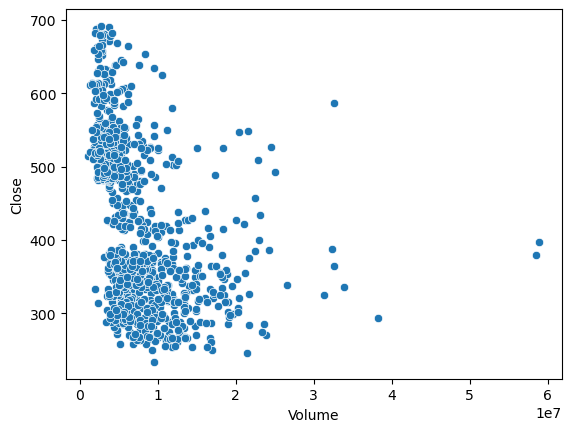

In [33]:
sns.scatterplot(data = dataset, 
                x= 'Volume', 
                y = 'Close',
               )

As we see, most of the observations have value of close to be high at lower values of Volume, and there are only few observations at high volume region, that have low close values. This kind of behavior implies slightly negative correlation

##### Boxplot

<Axes: >

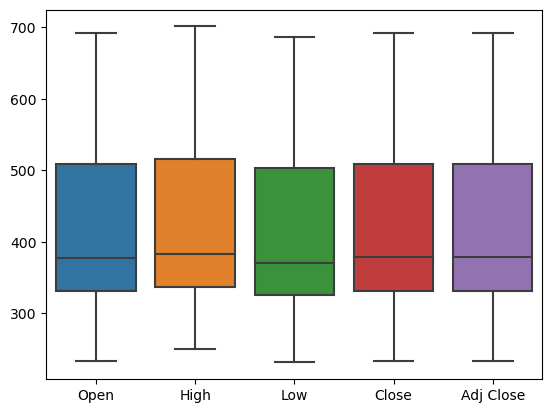

In [36]:
sns.boxplot(data = dataset.iloc[:,:-1])

And from above we see that all the variables are equally distributed, their means are close to each other.

##### Relation b/w Open and High Variables

<Axes: xlabel='Open', ylabel='High'>

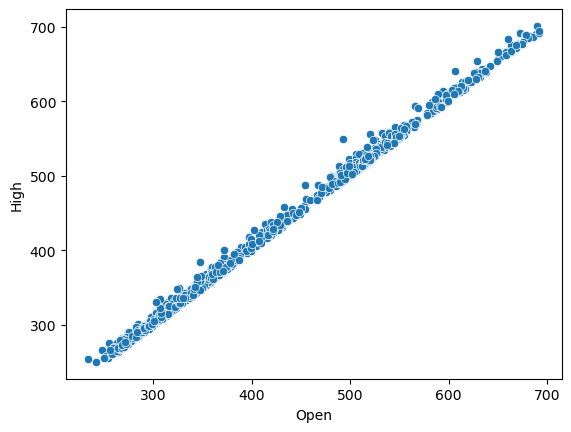

In [39]:
sns.scatterplot(data = dataset, 
                x= 'Open', 
                y = 'High',
               )

##### Relation b/w Open and Low Variables

<Axes: xlabel='Open', ylabel='Low'>

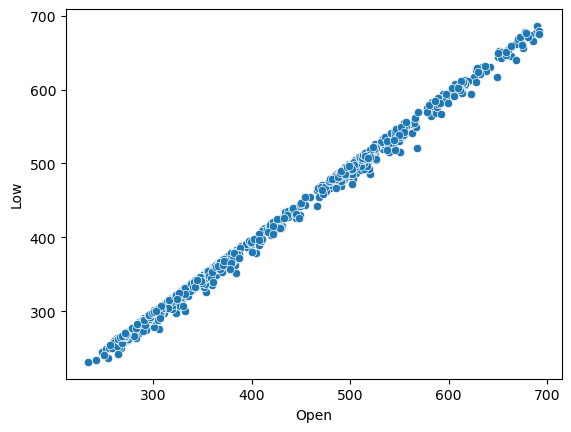

In [40]:
sns.scatterplot(data = dataset, 
                x= 'Open', 
                y = 'Low',
               )

##### Relation b/w High and Low Variables

<Axes: xlabel='High', ylabel='Low'>

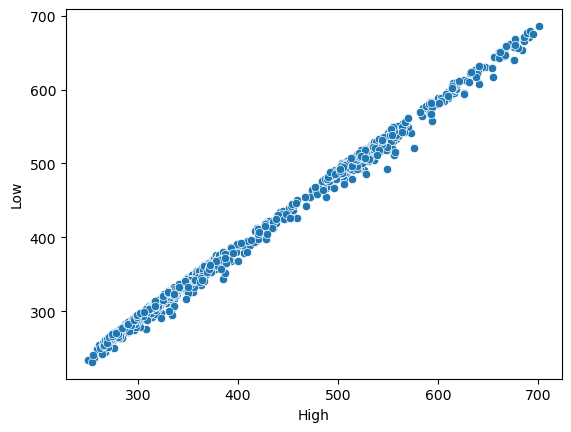

In [42]:
sns.scatterplot(data = dataset, 
                x= 'High', 
                y = 'Low',
               )

As we see, most of the relationships are linear.

#### Train Test Split

In [14]:
X = dataset[['Open', 'High', 'Low', 'Volume']]
y = dataset['Close']

In [15]:
X.head()

,Open,High,Low,Volume
0,262.000000,267.899994,250.029999,11896100
1,247.699997,266.700012,245.000000,12595800
2,266.579987,272.450012,264.329987,8981500
3,267.079987,267.619995,250.000000,9306700
4,253.850006,255.800003,236.110001,16906900


In [17]:
y[:5]

0    254.259995
1    265.720001
2    264.559998
3    250.100006
4    249.470001
Name: Close, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((756, 4), (253, 4), (756,), (253,))

#### Feature Scaling

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.60274087,  0.65476309,  0.64920688,  0.10003629],
       [ 1.84268394,  1.77661361,  1.81608365, -0.905156  ],
       [ 0.36228902,  0.37703955,  0.38187437, -0.63267406],
       ...,
       [-0.49874313, -0.50989311, -0.46998237,  0.0423014 ],
       [-1.11894897, -1.12068056, -1.08529103, -0.52962377],
       [-0.59829849, -0.62010965, -0.56441279, -0.5165558 ]])

In [126]:
X_train[:,1]

array([ 6.54763093e-01,  1.77661361e+00,  3.77039548e-01,  1.10426482e+00,
        1.06210916e+00, -5.35798914e-01, -4.81944248e-01, -1.82360233e-02,
        5.42874983e-01,  2.41195468e-01, -6.81578337e-01,  8.82902860e-01,
        1.74170076e+00, -8.31257432e-01, -5.09428672e-01, -6.70343200e-01,
        6.14186072e-01,  8.48268853e-01, -4.79529975e-01,  1.19693200e+00,
       -1.08669631e+00, -7.87709326e-01,  7.02396483e-01,  6.72405120e-01,
       -8.80283841e-01, -1.35996281e+00,  2.44723931e-01, -1.34120659e+00,
        1.01299010e+00,  1.23364901e-01, -7.28004870e-01,  8.45018652e-01,
       -1.14695785e+00,  8.26912759e-01,  6.34706803e-01,  1.06405928e+00,
       -5.77582793e-01,  9.92191103e-01, -5.11285854e-01,  5.61724146e-01,
        1.97461749e-01,  7.64329598e-01,  8.67674827e-01, -6.52793832e-01,
        8.75845934e-01, -1.10043837e+00, -1.02420609e+00,  7.15860289e-01,
        1.00296181e+00,  7.33502316e-01,  1.20779564e+00,  9.97019639e-01,
       -5.07014687e-01,  

#### We try building various models to predict the stock price, and then select the model with better performance

#### 1. Simple Linear Regression

As we see, most of the features have linear relationship with each other, we start using a single column to predict the stock price.

In [209]:
colList = X.columns
colList

Index(['Open', 'High', 'Low', 'Volume'], dtype='object')

In [210]:
train_r2score = []
test_r2score = []
train_error = []
test_error = []
abs_train = []
abs_test = []
for i,col in enumerate(colList):
#     print(i,col)
    train_x = X_train[:,i].reshape(-1,1)
    test_x = X_test[:,i].reshape(-1,1)
    
    LinearRegressor = LinearRegression()
    LinearRegressor.fit(train_x,y_train)
    
    train_err = mean_squared_error(y_train, LinearRegressor.predict(train_x))
    test_err = mean_squared_error(y_test, LinearRegressor.predict(test_x))
    
    train_r2 = r2_score(y_train, LinearRegressor.predict(train_x))
    test_r2 = r2_score(y_test, LinearRegressor.predict(test_x))
    
    abs_train.append(mean_absolute_error(y_train, LinearRegressor.predict(train_x)))
    abs_test.append(mean_absolute_error(y_test, LinearRegressor.predict(test_x)))
    train_error.append(train_err)
    test_error.append(test_err)
    train_r2score.append(train_r2)
    test_r2score.append(test_r2)
    

In [211]:
error_df = pd.DataFrame(zip(colList,train_error, test_error), columns = ["Features","train_error","test_error"])
error_df

,Features,train_error,test_error
0,Open,71.385733,84.425377
1,High,32.260445,39.009717
2,Low,31.678438,41.338110
3,Volume,9143.830249,11565.041714


<Axes: >

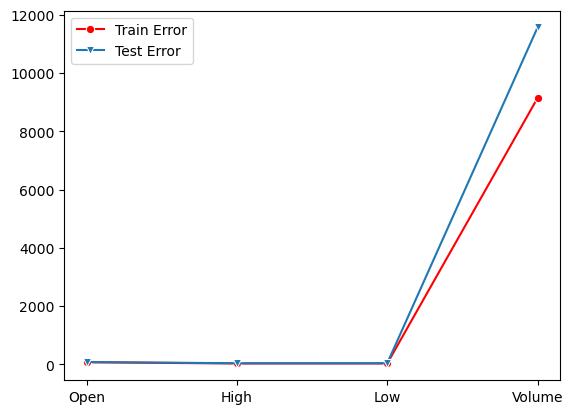

In [212]:
sns.lineplot(x=colList, y = train_error, marker='o', color='r', label='Train Error')
sns.lineplot(x=colList, y = test_error, marker='v', label='Test Error')


In [213]:
r2_df = pd.DataFrame(zip(colList,train_r2score, test_r2score), columns = ["Features","train_r2","test_r2"])
r2_df

,Features,train_r2,test_r2
0,Open,0.993730,0.993344
1,High,0.997166,0.996925
2,Low,0.997217,0.996741
3,Volume,0.196835,0.088258


<Axes: >

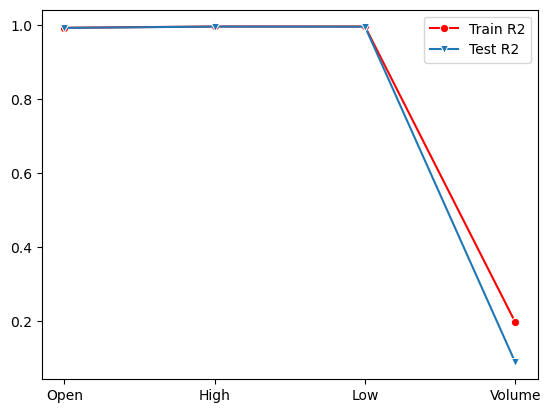

In [214]:
sns.lineplot(x=colList, y = train_r2score, marker='o', color='r', label='Train R2')
sns.lineplot(x=colList, y = test_r2score, marker='v', label='Test R2')


In [215]:
mae_df = pd.DataFrame(zip(colList,abs_train, abs_test), columns = ["Features","train_mae","test_mae"])
mae_df

,Features,train_mae,test_mae
0,Open,6.317449,6.529204
1,High,4.113193,4.485450
2,Low,4.092418,4.407517
3,Volume,81.123318,88.444595


<Axes: >

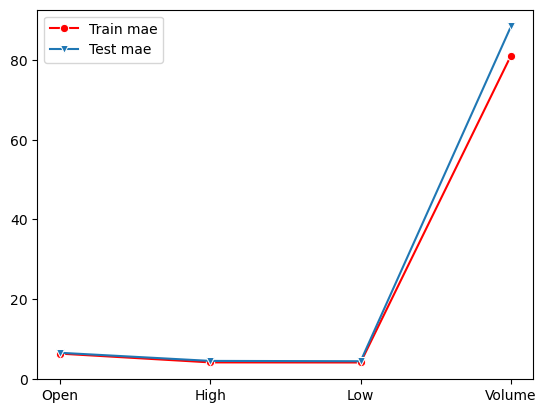

In [217]:
sns.lineplot(x=colList, y = abs_train, marker='o', color='r', label='Train mae')
sns.lineplot(x=colList, y = abs_test, marker='v', label='Test mae')


#### Fitting a model with only one column i.e., using feature High

In [119]:
LinearRegressor = LinearRegression()
train_x = X_train[:,1].reshape(-1,1)
test_x = X_test[:,1].reshape(-1,1)
LinearRegressor.fit(train_x, y_train)

LinearRegression()

In [120]:
y_pred = LinearRegressor.predict(X_test[:,1].reshape(-1,1))
y_pred[0:5]

array([361.48824577, 357.76834976, 269.36170831, 548.86760896,
       265.38457722])

#### Vizualize train set results

<Axes: ylabel='Close'>

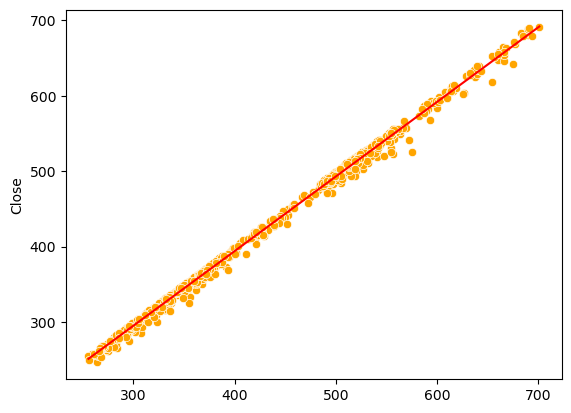

In [152]:
sns.scatterplot(
    x = sc.inverse_transform(
        X_train)[:,1],
        y = y_train,
    color = 'orange'
)
sns.lineplot(
    x = sc.inverse_transform(
        X_train)[:,1],
    y = LinearRegressor.predict(train_x),
    color = 'red'
)

#### Vizualize test set results

<Axes: ylabel='Close'>

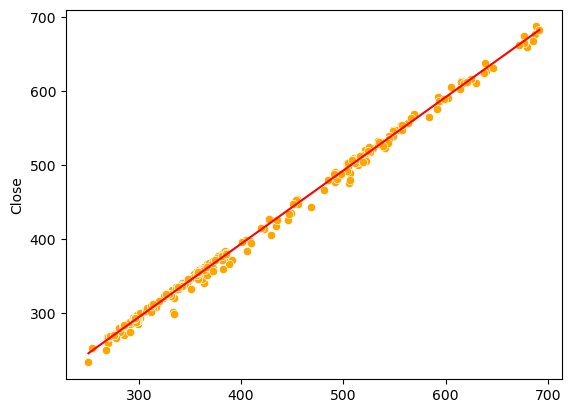

In [153]:
sns.scatterplot(
    x = sc.inverse_transform(
        X_test)[:,1],
        y = y_test,
    color = 'orange'
)
sns.lineplot(
    x = sc.inverse_transform(
        X_test)[:,1],
    y = LinearRegressor.predict(test_x),
    color = 'red'
)

#### 2. Multiple Linear Regression

Now we use all the existing features to build the model and check the train and test loss and r_squared value

In [218]:
MultipleRegressor = LinearRegression()
MultipleRegressor.fit(X_train,y_train)

LinearRegression()

In [219]:
MultipleRegressor.coef_

array([-61.00325074,  84.50526387,  83.24649151,   0.31850984])

In [220]:
MultipleRegressor.intercept_

420.21887505423285

In [221]:
y_pred = MultipleRegressor.predict(X_test)

In [222]:
mean_squared_error(y_train, MultipleRegressor.predict(X_train))

14.543984735254213

In [223]:
mean_squared_error(y_test, y_pred)

16.62026384511313

In [224]:
mean_absolute_error(y_test, y_pred)

3.0537774971199956

In [225]:
r2_score(y_train, MultipleRegressor.predict(X_train))

0.9987225029389595

In [226]:
r2_score(y_test, y_pred)

0.9986897244272149

#### 3. Artificial Neural Networks

In [227]:
# Initialize an ANN
# Sequential() allows to build sequential layers
ann = tf.keras.models.Sequential()
ann

In [228]:
# Adding input layer and first input layer
# dense class is used to create a fully connnected layer as a dense class object at any phase in an ann.
# add method is used to add any layer( hidden/ dropout/ conv2D) created using dense class
# When you create a first hidden layer, it automatically creates an input layer by assining
# # of neurons == # of input features. So in below, we mention # of neurons req for the first hidden layer
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))

In [229]:
# Add second sequnetial layer
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))

In [230]:
# Add output layer
# When doing multiclass classification, use softmax instead of sigmoid
ann.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

In [231]:
# Compiling an ANN
# in this step, we mention the optimizer, loss function and metrics required to evaluate our model

ann.compile(optimizer = 'adam', 
            loss = tf.keras.losses.MeanSquaredError(), 
            metrics = tf.keras.metrics.R2Score())

In [232]:
X_train

array([[ 0.60274087,  0.65476309,  0.64920688,  0.10003629],
       [ 1.84268394,  1.77661361,  1.81608365, -0.905156  ],
       [ 0.36228902,  0.37703955,  0.38187437, -0.63267406],
       ...,
       [-0.49874313, -0.50989311, -0.46998237,  0.0423014 ],
       [-1.11894897, -1.12068056, -1.08529103, -0.52962377],
       [-0.59829849, -0.62010965, -0.56441279, -0.5165558 ]])

In [233]:
# Training an ANN
ann.fit(X_train, y_train, batch_size = 16, epochs = 300)

Epoch 1/300
48/48 [==============================] - 0s 336us/step - loss: 187825.4531 - r2_score: -15.4980
Epoch 2/300
48/48 [==============================] - 0s 322us/step - loss: 187134.2188 - r2_score: -15.4373
Epoch 3/300
48/48 [==============================] - 0s 295us/step - loss: 185890.7500 - r2_score: -15.3280
Epoch 4/300
48/48 [==============================] - 0s 298us/step - loss: 183794.3281 - r2_score: -15.1440
Epoch 5/300
48/48 [==============================] - 0s 308us/step - loss: 180580.5781 - r2_score: -14.8617
Epoch 6/300
48/48 [==============================] - 0s 326us/step - loss: 175924.1406 - r2_score: -14.4525
Epoch 7/300
48/48 [==============================] - 0s 308us/step - loss: 169448.3750 - r2_score: -13.8838
Epoch 8/300
48/48 [==============================] - 0s 302us/step - loss: 160997.6406 - r2_score: -13.1414
Epoch 9/300
48/48 [==============================] - 0s 347us/step - loss: 150479.4219 - r2_score: -12.2177
Epoch 10/300
48/48 [========

48/48 [==============================] - 0s 291us/step - loss: 840.0787 - r2_score: 0.9262
Epoch 79/300
48/48 [==============================] - 0s 292us/step - loss: 806.9789 - r2_score: 0.9291
Epoch 80/300
48/48 [==============================] - 0s 296us/step - loss: 776.2349 - r2_score: 0.9318
Epoch 81/300
48/48 [==============================] - 0s 293us/step - loss: 744.1288 - r2_score: 0.9346
Epoch 82/300
48/48 [==============================] - 0s 294us/step - loss: 714.7043 - r2_score: 0.9372
Epoch 83/300
48/48 [==============================] - 0s 287us/step - loss: 684.8367 - r2_score: 0.9398
Epoch 84/300
48/48 [==============================] - 0s 287us/step - loss: 656.1943 - r2_score: 0.9424
Epoch 85/300
48/48 [==============================] - 0s 284us/step - loss: 631.6326 - r2_score: 0.9445
Epoch 86/300
48/48 [==============================] - 0s 292us/step - loss: 612.7784 - r2_score: 0.9462
Epoch 87/300
48/48 [==============================] - 0s 289us/step - loss: 5

48/48 [==============================] - 0s 280us/step - loss: 33.6709 - r2_score: 0.9970
Epoch 157/300
48/48 [==============================] - 0s 319us/step - loss: 32.6776 - r2_score: 0.9971
Epoch 158/300
48/48 [==============================] - 0s 305us/step - loss: 32.0816 - r2_score: 0.9972
Epoch 159/300
48/48 [==============================] - 0s 306us/step - loss: 31.3792 - r2_score: 0.9972
Epoch 160/300
48/48 [==============================] - 0s 298us/step - loss: 31.1380 - r2_score: 0.9973
Epoch 161/300
48/48 [==============================] - 0s 307us/step - loss: 30.2516 - r2_score: 0.9973
Epoch 162/300
48/48 [==============================] - 0s 309us/step - loss: 29.7812 - r2_score: 0.9974
Epoch 163/300
48/48 [==============================] - 0s 314us/step - loss: 29.0404 - r2_score: 0.9974
Epoch 164/300
48/48 [==============================] - 0s 293us/step - loss: 28.9806 - r2_score: 0.9975
Epoch 165/300
48/48 [==============================] - 0s 297us/step - loss: 2

48/48 [==============================] - 0s 275us/step - loss: 19.8680 - r2_score: 0.9983
Epoch 235/300
48/48 [==============================] - 0s 293us/step - loss: 20.0207 - r2_score: 0.9982
Epoch 236/300
48/48 [==============================] - 0s 304us/step - loss: 20.4772 - r2_score: 0.9982
Epoch 237/300
48/48 [==============================] - 0s 289us/step - loss: 19.8416 - r2_score: 0.9983
Epoch 238/300
48/48 [==============================] - 0s 299us/step - loss: 20.9659 - r2_score: 0.9982
Epoch 239/300
48/48 [==============================] - 0s 296us/step - loss: 20.3208 - r2_score: 0.9982
Epoch 240/300
48/48 [==============================] - 0s 297us/step - loss: 20.6384 - r2_score: 0.9982
Epoch 241/300
48/48 [==============================] - 0s 291us/step - loss: 19.9533 - r2_score: 0.9982
Epoch 242/300
48/48 [==============================] - 0s 289us/step - loss: 19.7427 - r2_score: 0.9983
Epoch 243/300
48/48 [==============================] - 0s 287us/step - loss: 1

In [267]:
y_pred = ann.predict(X_test)
y_pred[:5]

8/8 [==============================] - 0s 428us/step


array([[363.418  ],
       [360.14584],
       [270.6936 ],
       [551.07166],
       [260.39267]], dtype=float32)

In [240]:
mean_squared_error(y_test, y_pred)

20.838947120969692

In [236]:
mean_squared_error(y_train, ann.predict(X_train))

24/24 [==============================] - 0s 309us/step


16.604560269241063

In [237]:
r2_score(y_test, y_pred)

0.9983571401976753

In [238]:
r2_score(y_train, ann.predict(X_train))

24/24 [==============================] - 0s 283us/step


0.9985415085803543

In [239]:
mean_absolute_error(y_test, y_pred)

3.4696369007689007

##### Plotting a scatter for the predictions

<Axes: xlabel='Close'>

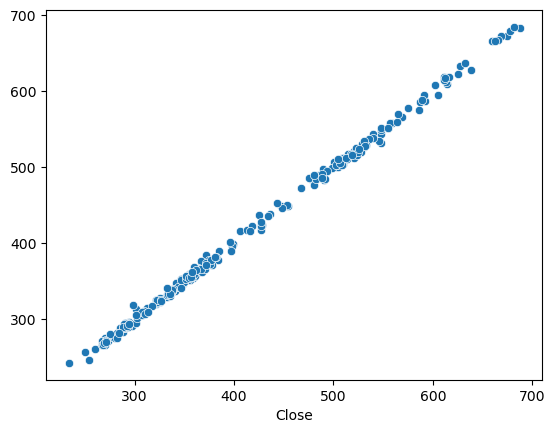

In [255]:
sns.scatterplot(x = y_test, y = y_pred.flatten())

This in a kind of evidence showing that the model is performing well for the given task. 

##### Plotting residuals

In [258]:
residuals = y_test - y_pred.flatten() 
residuals

284    2.812012
118    2.724151
432    0.576385
805    3.368347
221    0.187317
         ...   
955   -2.656005
59     3.484162
534   -8.733520
426    2.184509
404    0.232483
Name: Close, Length: 253, dtype: float64

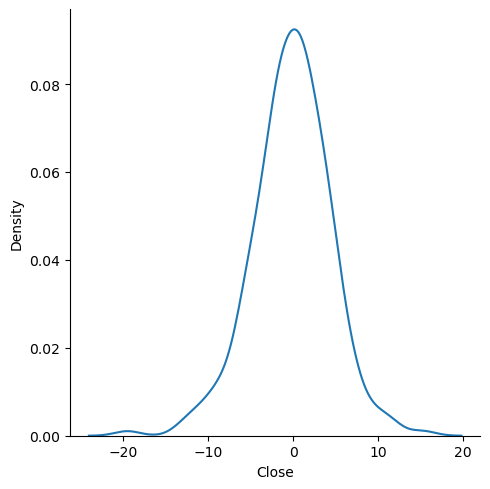

In [259]:
sns.displot(residuals, kind = 'kde')

#### pickle the model file for deployment

In [263]:
# pickle.dump(ann, open("ann_model.pkl", "wb"))

ann.save("ann_model.h5")

/Users/nithinkore/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [264]:
loaded_model = load_model('ann_model.h5')

In [265]:
loaded_model.predict(X_test)

8/8 [==============================] - 0s 705us/step


array([[363.418  ],
       [360.14584],
       [270.6936 ],
       [551.07166],
       [260.39267],
       [517.5325 ],
       [283.69772],
       [437.81143],
       [483.29977],
       [287.7408 ],
       [291.02396],
       [290.92648],
       [296.50046],
       [565.6561 ],
       [487.15335],
       [502.2814 ],
       [294.42456],
       [293.06583],
       [361.00568],
       [487.6017 ],
       [366.06326],
       [327.1844 ],
       [416.49316],
       [390.38535],
       [504.4413 ],
       [557.5775 ],
       [384.83142],
       [355.0668 ],
       [483.60748],
       [266.4    ],
       [340.10446],
       [587.827  ],
       [295.25748],
       [352.42627],
       [322.03348],
       [336.69446],
       [379.485  ],
       [357.93787],
       [288.79163],
       [355.24228],
       [483.45078],
       [558.5276 ],
       [286.65582],
       [521.32654],
       [319.8155 ],
       [508.54807],
       [619.135  ],
       [346.39615],
       [359.07504],
       [499.92587],
